# TMDB Movies Data Analysis

In this notebook, I will try to clean the movies data that I got from TMDB web scraping using scrapy. For more info about how i did the web scraping, go to this github page - https://github.com/Ndhel97/TMDB_webscraping. 

In [1]:
import json
import pandas as pd
  
# Opening JSON file
f = open('tmdb_links.json',)
  
# returns JSON object as 
# a dictionary
data = json.load(f)
df = pd.DataFrame.from_dict(pd.json_normalize(data), orient='columns')

In [2]:
list(df.columns.values)

['title',
 'link',
 'release',
 'runtime',
 'score',
 'overview',
 'poster',
 'genre.genre1',
 'genre.genre2',
 'genre.genre3',
 'genre.genre4',
 'genre.genre5',
 'people.Director',
 'people.null',
 'people.Director, Screenplay, Story',
 'people.Screenplay',
 'people.Writer',
 'people.Story',
 'people.Screenplay, Story',
 'people.Director, Writer',
 'people.Novel',
 'people.Characters',
 'people.Director, Screenplay',
 'people.Director, Story',
 'people.Novel, Screenplay',
 'people.Story, Writer',
 'people.Director, Story, Writer',
 'people.Characters, Screenplay, Story',
 'people.Director, Screenplay, Writer',
 'people.Author',
 'people.Characters, Writer',
 'people.Author, Screenplay',
 'people.Screenplay, Writer',
 'people.Characters, Director',
 'people.Screenplay, Story, Writer',
 'people.Characters, Story',
 'people.Characters, Screenplay',
 'people.Characters, Director, Writer',
 'people.Novel, Story',
 'people.Author, Characters',
 'people.Characters, Director, Story',
 'people

In [3]:
# Deletes unimportant columns. I think i just need info about directors and writers only in the people parts.
for col in df.columns[12:]:
    if ('Writer') in col:
        continue
    elif ('Director') in col:
        continue
    elif 'person' not in col:
        del df[col]
df

,title,link,release,runtime,score,overview,poster,genre.genre1,genre.genre2,genre.genre3,...,"people.Author, Writer","people.Director, Teleplay","people.Novel, Writer","people.Author, Director, Screenplay","people.Teleplay, Writer","people.Author, Director, Story","people.Director, Screenplay, Story, Writer","people.Characters, Director, Screenplay, Story","people.Characters, Screenplay, Writer","people.Novel, Story, Writer"
0,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,/movie/635302,"[01/06/2021, (ID)]",1h57m,83.0,"Tanjiro Kamado, joined with Inosuke Hashibira,...",/t/p/w300_and_h450_bestv2/h8Rb9gBr48ODIwYUttZN...,Animation,Action,Adventure,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Space Sweepers,/movie/581389,"[02/05/2021, (US)]",2h16m,72.0,When the crew of a space junk collector ship c...,/t/p/w300_and_h450_bestv2/p9YDHJKvUoi7v2SCd3vL...,Drama,Fantasy,Science Fiction,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,New Gods: Nezha Reborn,/movie/663558,"[02/12/2021, (CN)]",1h56m,88.0,3000 years after the boy-god Nezha conquers th...,/t/p/w300_and_h450_bestv2/6goDkAD6J3br81YMQf0G...,Animation,Action,Fantasy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Godzilla vs. Kong,/movie/399566-godzilla-vs-kong,"[03/24/2021, (ID)]",1h53m,82.0,"In a time when monsters walk the Earth, humani...",/t/p/w300_and_h450_bestv2/pgqgaUx1cJb5oZQQ5v0t...,Science Fiction,Action,Drama,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mortal Kombat,/movie/460465-mortal-kombat,"[04/14/2021, (ID)]",1h50m,79.0,"Washed-up MMA fighter Cole Young, unaware of h...",/t/p/w300_and_h450_bestv2/6Wdl9N6dL0Hi0T1qJLWS...,Fantasy,Action,Adventure,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,Outside the Wire,/movie/775996-outside-the-wire,"[01/15/2021, (US)]",1h56m,65.0,"In the near future, a drone pilot is sent into...",/t/p/w300_and_h450_bestv2/6XYLiMxHAaCsoyrVo38L...,Thriller,Action,Science Fiction,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9994,Zack Snyder's Justice League,/movie/791373-zack-snyder-s-justice-league,"[03/18/2021, (ID)]",4h2m,85.0,Determined to ensure Superman's ultimate sacri...,/t/p/w300_and_h450_bestv2/tnAuB8q5vv7Ax9UAEje5...,Action,Adventure,Fantasy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9995,The Unholy,/movie/632357-the-unholy,"[03/31/2021, (ID)]",1h39m,57.0,"Alice, a young hearing-impaired girl who, afte...",/t/p/w300_and_h450_bestv2/b4gYVcl8pParX8AjkN90...,Horror,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,Nobody,/movie/615457-nobody,"[04/28/2021, (ID)]",1h32m,85.0,"Hutch Mansell, a suburban dad, overlooked husb...",/t/p/w300_and_h450_bestv2/oBgWY00bEFeZ9N25wWVy...,Action,Thriller,Crime,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Joins the columns that contain director into director only column and writer to writer only column. But, if the column contains both director and writer, the column will get into director, writer column
for col in df.columns[12:]:
    if 'Director' in col and 'Writer' in col :
        df['people.Director, Writer'] = df['people.Director, Writer'].fillna(df[col])
    elif 'Director' in col:
        df['people.Director'] = df['people.Director'].fillna(df[col])
    elif ('Writer') in col:
        df['people.Writer'] = df['people.Writer'].fillna(df[col])

In [5]:
# Deletes all other columns except 'director', 'writer', and 'director, writer' columns.
for col in df.columns[12:]:
    if (col == 'people.Director') or (col == 'people.Writer') or (col == 'people.Director, Writer'):
        continue
    else:
        del df[col]

df

,title,link,release,runtime,score,overview,poster,genre.genre1,genre.genre2,genre.genre3,genre.genre4,genre.genre5,people.Director,people.Writer,"people.Director, Writer"
0,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,/movie/635302,"[01/06/2021, (ID)]",1h57m,83.0,"Tanjiro Kamado, joined with Inosuke Hashibira,...",/t/p/w300_and_h450_bestv2/h8Rb9gBr48ODIwYUttZN...,Animation,Action,Adventure,Fantasy,Drama,Haruo Sotozaki,NaN,NaN
1,Space Sweepers,/movie/581389,"[02/05/2021, (US)]",2h16m,72.0,When the crew of a space junk collector ship c...,/t/p/w300_and_h450_bestv2/p9YDHJKvUoi7v2SCd3vL...,Drama,Fantasy,Science Fiction,None,None,Jo Sung-hee,NaN,NaN
2,New Gods: Nezha Reborn,/movie/663558,"[02/12/2021, (CN)]",1h56m,88.0,3000 years after the boy-god Nezha conquers th...,/t/p/w300_and_h450_bestv2/6goDkAD6J3br81YMQf0G...,Animation,Action,Fantasy,None,None,赵霁,Mu Chuan Chen,NaN
3,Godzilla vs. Kong,/movie/399566-godzilla-vs-kong,"[03/24/2021, (ID)]",1h53m,82.0,"In a time when monsters walk the Earth, humani...",/t/p/w300_and_h450_bestv2/pgqgaUx1cJb5oZQQ5v0t...,Science Fiction,Action,Drama,None,None,Adam Wingard,NaN,NaN
4,Mortal Kombat,/movie/460465-mortal-kombat,"[04/14/2021, (ID)]",1h50m,79.0,"Washed-up MMA fighter Cole Young, unaware of h...",/t/p/w300_and_h450_bestv2/6Wdl9N6dL0Hi0T1qJLWS...,Fantasy,Action,Adventure,Science Fiction,Thriller,Simon McQuoid,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,Outside the Wire,/movie/775996-outside-the-wire,"[01/15/2021, (US)]",1h56m,65.0,"In the near future, a drone pilot is sent into...",/t/p/w300_and_h450_bestv2/6XYLiMxHAaCsoyrVo38L...,Thriller,Action,Science Fiction,None,None,Mikael Håfström,Rowan Athale,NaN
9994,Zack Snyder's Justice League,/movie/791373-zack-snyder-s-justice-league,"[03/18/2021, (ID)]",4h2m,85.0,Determined to ensure Superman's ultimate sacri...,/t/p/w300_and_h450_bestv2/tnAuB8q5vv7Ax9UAEje5...,Action,Adventure,Fantasy,Science Fiction,None,Zack Snyder,NaN,NaN
9995,The Unholy,/movie/632357-the-unholy,"[03/31/2021, (ID)]",1h39m,57.0,"Alice, a young hearing-impaired girl who, afte...",/t/p/w300_and_h450_bestv2/b4gYVcl8pParX8AjkN90...,Horror,None,None,None,None,Evan Spiliotopoulos,NaN,NaN
9996,Nobody,/movie/615457-nobody,"[04/28/2021, (ID)]",1h32m,85.0,"Hutch Mansell, a suburban dad, overlooked husb...",/t/p/w300_and_h450_bestv2/oBgWY00bEFeZ9N25wWVy...,Action,Thriller,Crime,None,None,Ilya Naishuller,NaN,NaN


In [6]:
# Separate the release_date column into release_date and release_country columns 
df = df.join(pd.DataFrame(df['release'].to_list(), columns=['release_date', 'release_country']))
df = df.drop(['release'], axis = 1)

# Reorder the columns
df = df[['title', 'link', 'release_date', 'release_country', 'runtime', 'score', 'overview', 'poster', 'genre.genre1', 'genre.genre2', 'genre.genre3', 'genre.genre4', 'genre.genre5', 'people.Director', 'people.Writer', 'people.Director, Writer']]
df.columns = ['title', 'link', 'release_date', 'release_country', 'runtime', 'score', 'overview', 'poster', 'genre1', 'genre2', 'genre3', 'genre4', 'genre5', 'Director', 'Writer', 'Director, Writer']

df

,title,link,release_date,release_country,runtime,score,overview,poster,genre1,genre2,genre3,genre4,genre5,Director,Writer,"Director, Writer"
0,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,/movie/635302,01/06/2021,(ID),1h57m,83.0,"Tanjiro Kamado, joined with Inosuke Hashibira,...",/t/p/w300_and_h450_bestv2/h8Rb9gBr48ODIwYUttZN...,Animation,Action,Adventure,Fantasy,Drama,Haruo Sotozaki,NaN,NaN
1,Space Sweepers,/movie/581389,02/05/2021,(US),2h16m,72.0,When the crew of a space junk collector ship c...,/t/p/w300_and_h450_bestv2/p9YDHJKvUoi7v2SCd3vL...,Drama,Fantasy,Science Fiction,None,None,Jo Sung-hee,NaN,NaN
2,New Gods: Nezha Reborn,/movie/663558,02/12/2021,(CN),1h56m,88.0,3000 years after the boy-god Nezha conquers th...,/t/p/w300_and_h450_bestv2/6goDkAD6J3br81YMQf0G...,Animation,Action,Fantasy,None,None,赵霁,Mu Chuan Chen,NaN
3,Godzilla vs. Kong,/movie/399566-godzilla-vs-kong,03/24/2021,(ID),1h53m,82.0,"In a time when monsters walk the Earth, humani...",/t/p/w300_and_h450_bestv2/pgqgaUx1cJb5oZQQ5v0t...,Science Fiction,Action,Drama,None,None,Adam Wingard,NaN,NaN
4,Mortal Kombat,/movie/460465-mortal-kombat,04/14/2021,(ID),1h50m,79.0,"Washed-up MMA fighter Cole Young, unaware of h...",/t/p/w300_and_h450_bestv2/6Wdl9N6dL0Hi0T1qJLWS...,Fantasy,Action,Adventure,Science Fiction,Thriller,Simon McQuoid,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,Outside the Wire,/movie/775996-outside-the-wire,01/15/2021,(US),1h56m,65.0,"In the near future, a drone pilot is sent into...",/t/p/w300_and_h450_bestv2/6XYLiMxHAaCsoyrVo38L...,Thriller,Action,Science Fiction,None,None,Mikael Håfström,Rowan Athale,NaN
9994,Zack Snyder's Justice League,/movie/791373-zack-snyder-s-justice-league,03/18/2021,(ID),4h2m,85.0,Determined to ensure Superman's ultimate sacri...,/t/p/w300_and_h450_bestv2/tnAuB8q5vv7Ax9UAEje5...,Action,Adventure,Fantasy,Science Fiction,None,Zack Snyder,NaN,NaN
9995,The Unholy,/movie/632357-the-unholy,03/31/2021,(ID),1h39m,57.0,"Alice, a young hearing-impaired girl who, afte...",/t/p/w300_and_h450_bestv2/b4gYVcl8pParX8AjkN90...,Horror,None,None,None,None,Evan Spiliotopoulos,NaN,NaN
9996,Nobody,/movie/615457-nobody,04/28/2021,(ID),1h32m,85.0,"Hutch Mansell, a suburban dad, overlooked husb...",/t/p/w300_and_h450_bestv2/oBgWY00bEFeZ9N25wWVy...,Action,Thriller,Crime,None,None,Ilya Naishuller,NaN,NaN


In [7]:
# Save dataframe into json file
df.to_json('tmdb_movies_data.json', orient='records', compression = 'infer')

<AxesSubplot:>

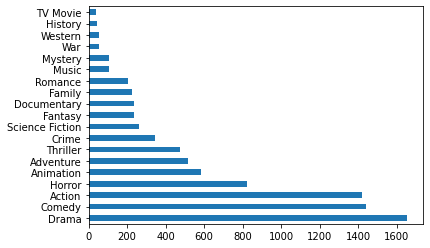

In [11]:
import matplotlib
df['genre1'].value_counts().plot(kind='barh')

In [12]:
df_links = df['link']

In [13]:
df_links

0                                    /movie/635302
1                                    /movie/581389
2                                    /movie/663558
3                   /movie/399566-godzilla-vs-kong
4                      /movie/460465-mortal-kombat
                           ...                    
9993                /movie/775996-outside-the-wire
9994    /movie/791373-zack-snyder-s-justice-league
9995                      /movie/632357-the-unholy
9996                          /movie/615457-nobody
9997                         /movie/9100-the-craft
Name: link, Length: 9998, dtype: object

In [14]:
# Save dataframe into json file
df_links.to_json('tmdb_movies_id.json')